In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris Flower Dataset
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Experiment 1.1


Number of Instances: 150 (50 in each of three classes)

Number of Attributes: 4 (numeric)

Attribute Information: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

Class: Iris-Setosa, Iris-Versicolour, Iris-Virginica


Let us consider only 2 features for easy visualization - sepal length in cm, sepal width in cm

Since we are doing unsupervised learning, we will not consider the classes of the data samples.

In [3]:
X_scaled=X_scaled[:,:-2]
X_scaled.shape

(150, 2)

In [4]:
feature_names = feature_names[:-2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

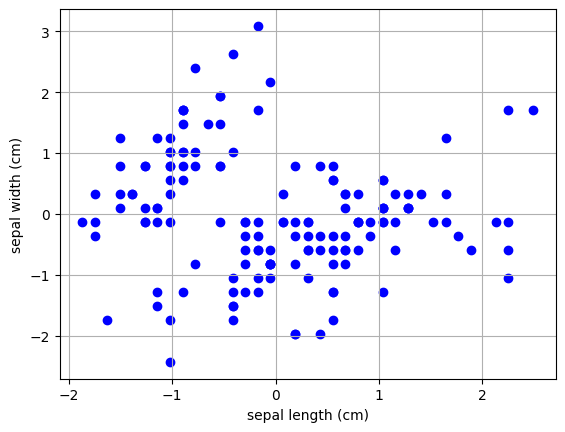

In [5]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid()
plt.show()

In [6]:
# Create a OCSVM Model
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.2)

In [7]:
x_data = torch.tensor(X_scaled)

# Fit the model
decision, y_pred = ocsvm.fit(x_data)

In [8]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.2, num_inducing_points=100)

In [9]:
classifier.fit()

(array([ 2.49547220e-02,  2.68295363e-02,  1.77288068e-02,  1.37611690e-02,
         2.00283516e-02,  1.49057289e-02,  8.09223944e-03,  2.46531632e-02,
         0.00000000e+00,  2.61255480e-02,  2.39116157e-02,  1.82789183e-02,
         2.35292128e-02, -7.28824281e-03,  6.14857229e-03, -4.92215111e-02,
         1.49057289e-02,  2.49547220e-02,  1.96086600e-02,  1.46784860e-02,
         2.81301271e-02,  1.94166390e-02,  6.67286325e-07,  2.78075473e-02,
         1.82789183e-02,  2.92842178e-02,  2.46531632e-02,  2.64119091e-02,
         2.76988146e-02,  1.77288068e-02,  2.29430530e-02,  2.81301271e-02,
        -8.05312005e-03, -1.51774228e-02,  2.61255480e-02,  2.73908972e-02,
         2.69638062e-02,  1.64585393e-02,  8.43044925e-04,  2.65517699e-02,
         2.27078322e-02, -2.82061757e-02, -6.47730965e-04,  2.27078322e-02,
         1.46784860e-02,  2.35292128e-02,  1.46784860e-02,  1.26129681e-02,
         2.31695745e-02,  2.61502428e-02,  2.11968509e-02,  2.23881579e-02,
         2.3

In [10]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 137, 'percentage': 91.33333333333333}, -1: {'count': 12, 'percentage': 8.0}}


In [12]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 32, 33, 41, 42, 60, 68, 117, 118, 122, 131]

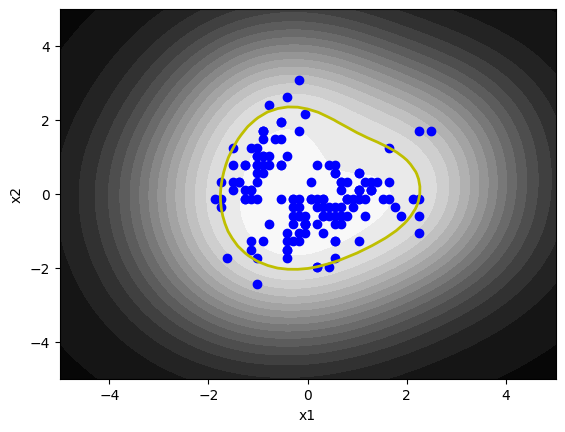

In [13]:
classifier.plot(-5, 5, -5, 5)

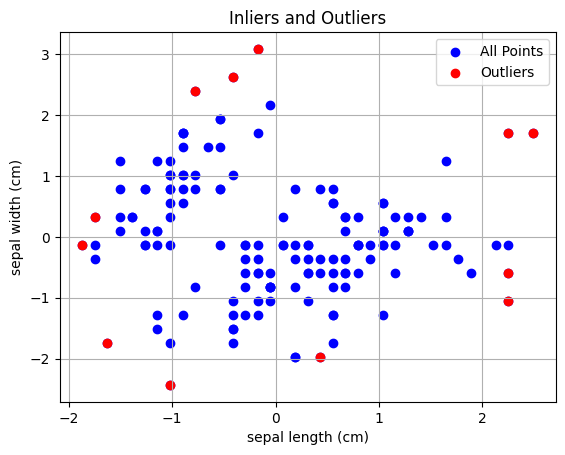

In [14]:
# Plot outliers with inliers

plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [15]:
outlier_features = x_data[indices]

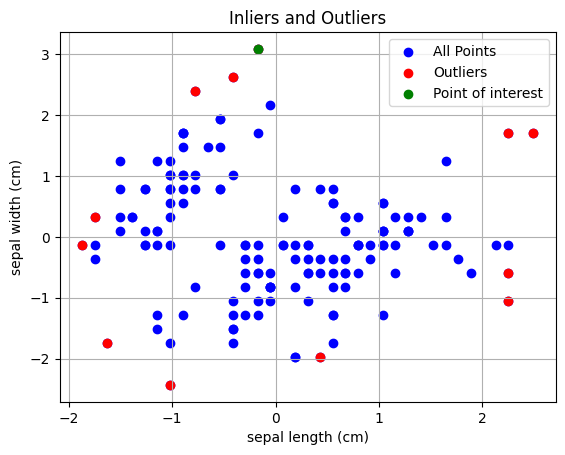

In [16]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.scatter(x_data[15, 0], x_data[15, 1], color='green', label='Point of interest')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

The point with index 15 is a clear outlier and the reason should be bause of very high sepal width (>3 cm). 
This point should have a very high shapley value for sepal width.

In [17]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [18]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 237.36it/s]


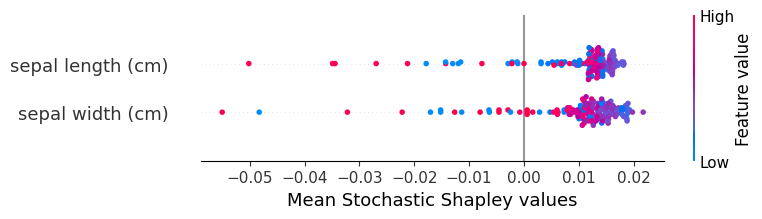

In [19]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/visualisation/deterministic_values.py:25: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025535429/work/aten/src/ATen/native/TensorShape.cpp:3641.)
  return shap.bar_plot(shapley_values.T.numpy(), query_data.numpy(), show=False,


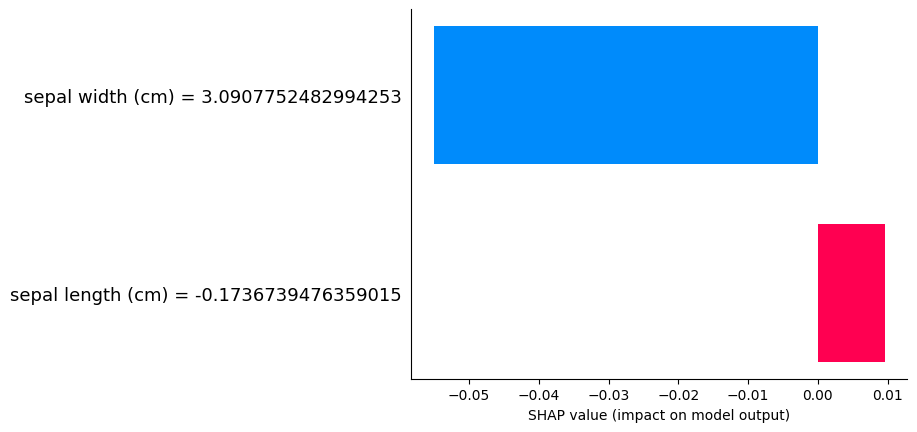

In [20]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

As expected, the sepal width has the highest impact in deciding that this point is an outlier

## Experiment 1.2

Let us now consider all 4 features of the iris dataset

In [21]:
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(150, 4)

In [22]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [24]:
x_data = torch.tensor(X_scaled)

# Fit the model
decision, y_pred = ocsvm.fit(x_data)

In [25]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [26]:
classifier.fit()

(array([ 1.29356905e-02,  3.73948823e-03,  8.94483145e-03,  6.95608439e-03,
         1.40277033e-02,  1.29630381e-02,  6.42438846e-03,  1.17521280e-02,
        -2.77555756e-17,  3.72502809e-03,  1.23990783e-02,  1.05235525e-02,
         2.75951441e-03, -6.13019023e-03,  4.65410662e-07, -2.20468004e-02,
         1.34618755e-02,  1.36054059e-02,  4.76152080e-03,  1.42039585e-02,
        -2.23379596e-07,  1.41881148e-02, -1.10218687e-07,  6.35460023e-03,
         7.01049628e-03,  1.42261016e-03,  1.14241088e-02,  1.13251378e-02,
         7.99659314e-03,  8.58693261e-03,  7.65902714e-03,  1.71542456e-03,
         7.98659249e-04,  5.62380026e-07,  6.53823694e-03,  5.71800393e-03,
        -2.29669478e-08,  1.03838244e-02,  9.10360370e-04,  1.04321375e-02,
         1.37162826e-02, -2.33195370e-02,  1.02161038e-03,  5.90365799e-03,
         9.48584690e-03,  6.94598539e-03,  1.30339561e-02,  7.57697519e-03,
         1.42980044e-02,  9.58484363e-03,  2.89663561e-07,  1.56811228e-02,
         1.4

In [27]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 140, 'percentage': 93.33333333333333}, -1: {'count': 10, 'percentage': 6.666666666666667}}


In [29]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[8, 13, 15, 20, 22, 36, 41, 60, 118, 131]

In [30]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [31]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 15/15 [00:01<00:00, 11.10it/s]


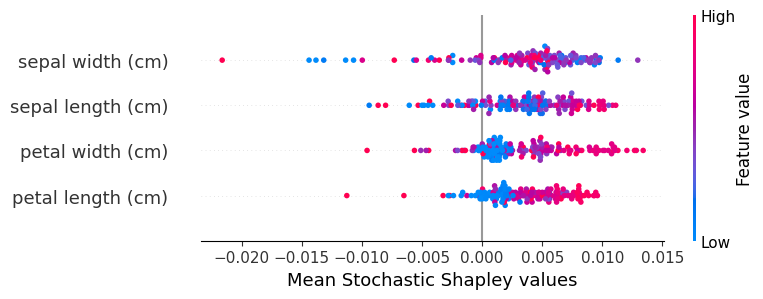

In [32]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

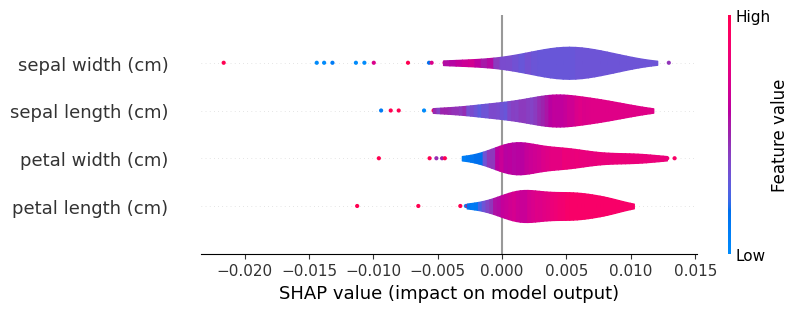

In [33]:
violin_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)


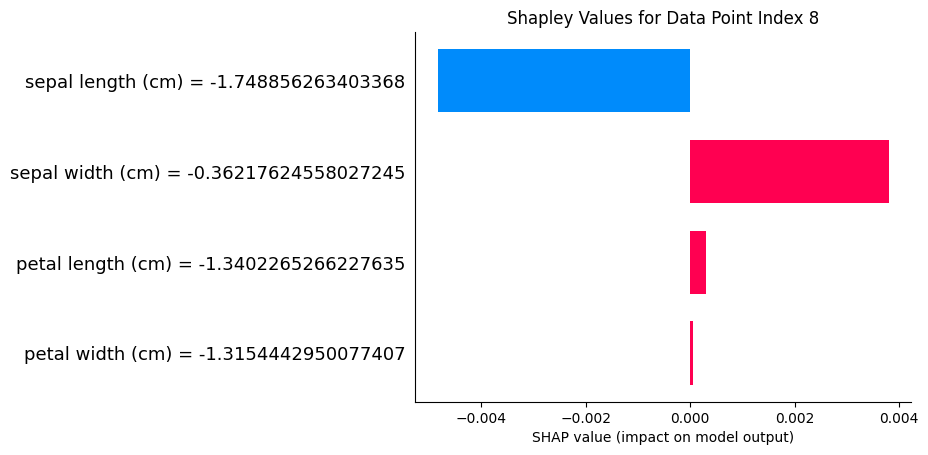

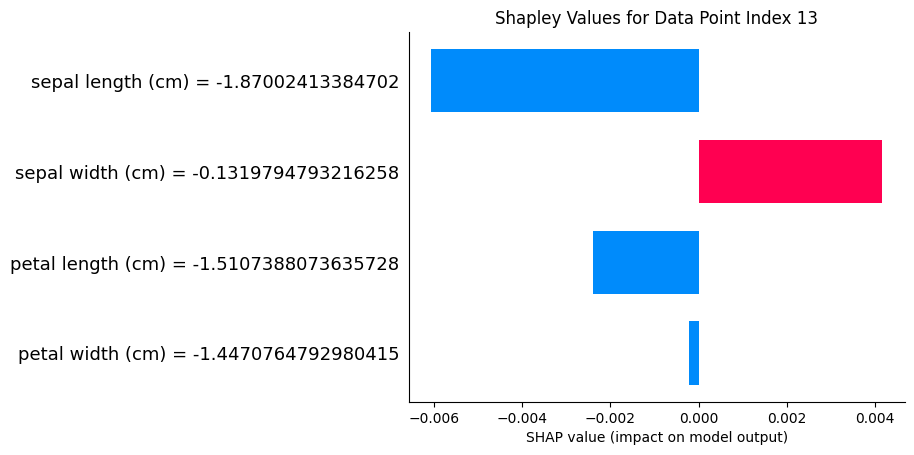

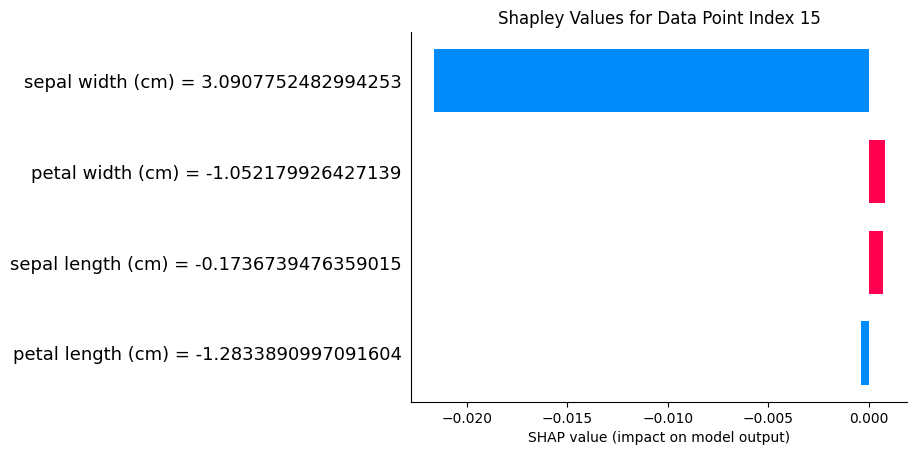

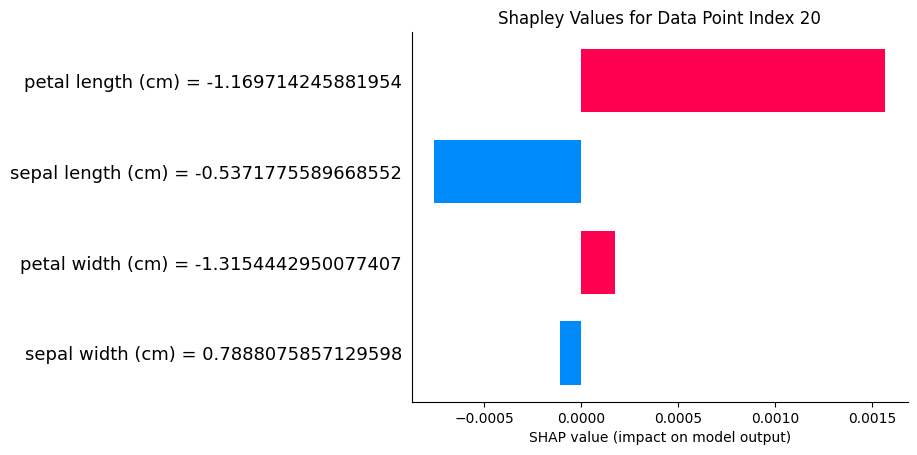

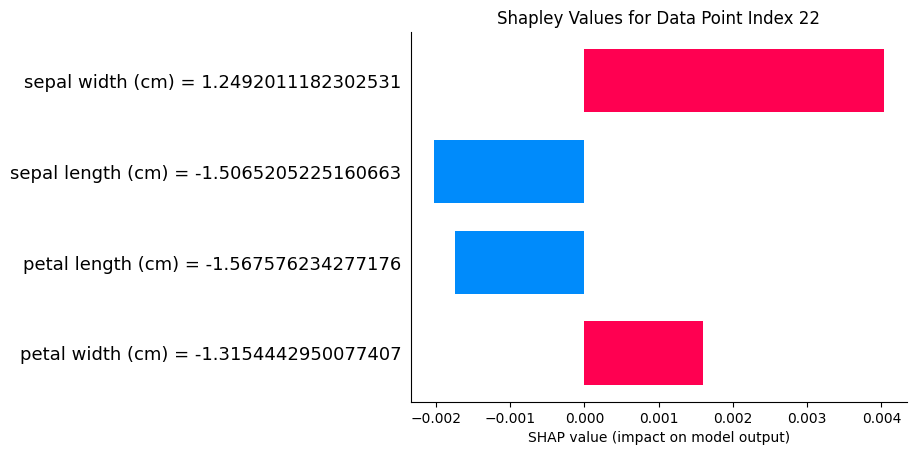

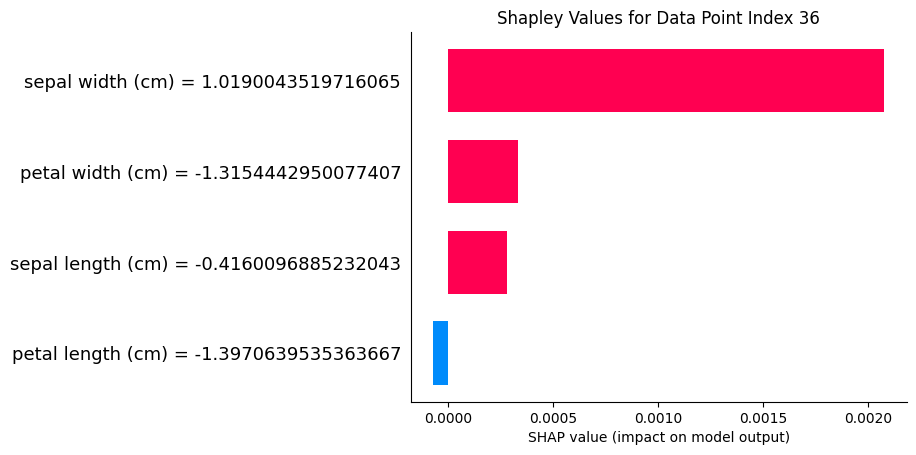

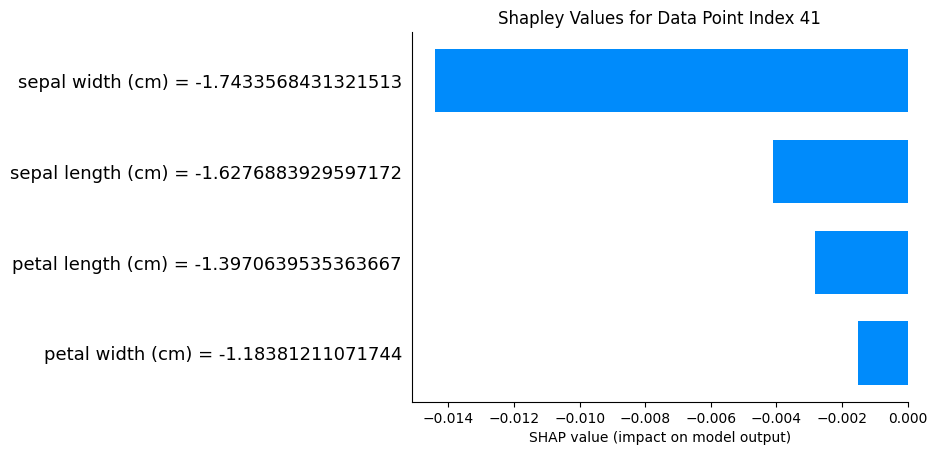

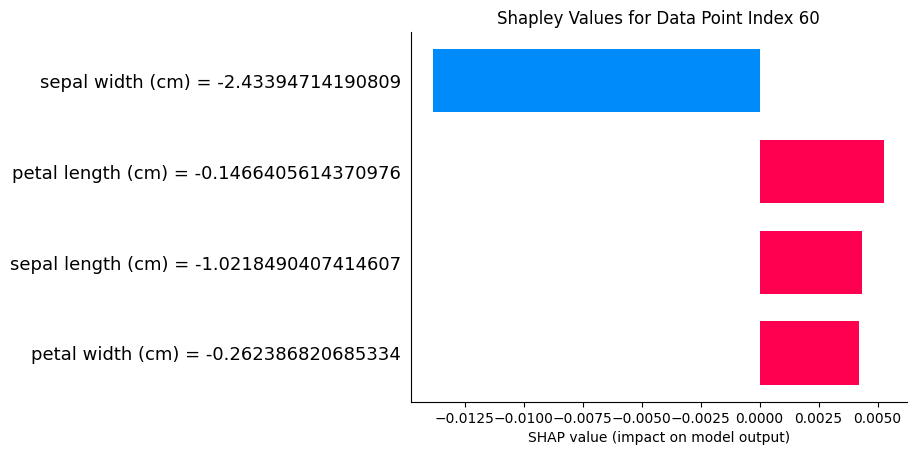

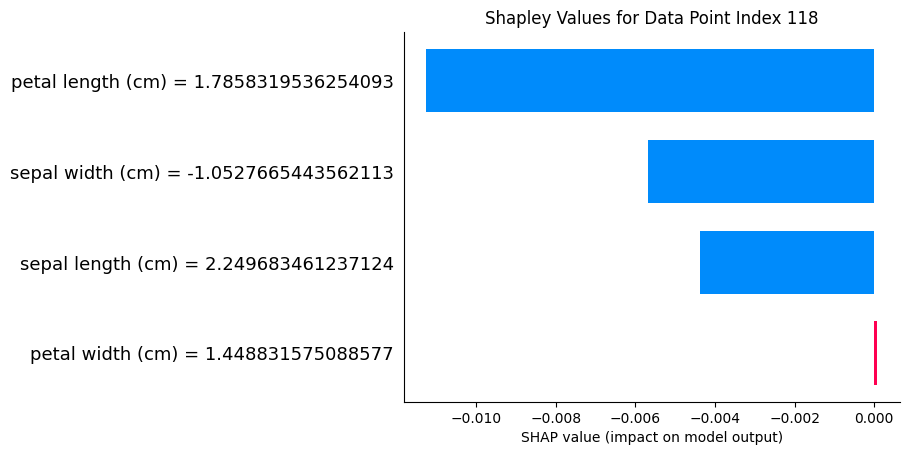

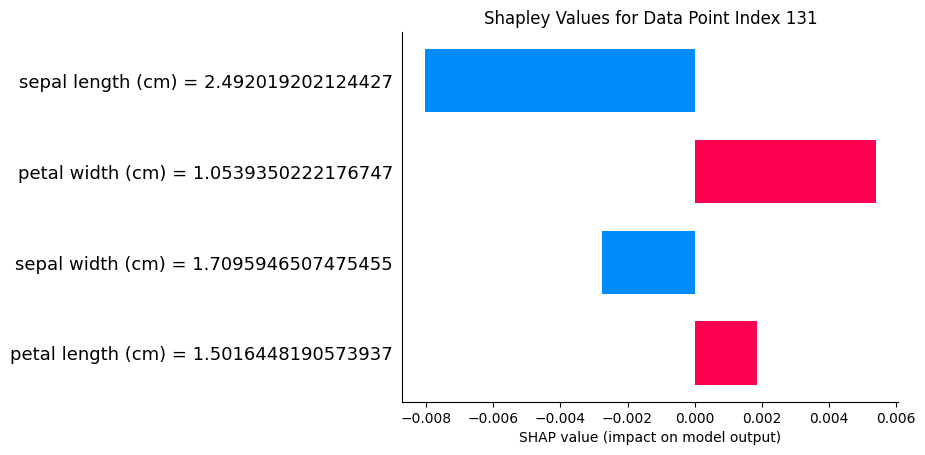

In [34]:
# Bar plot to dipict the contributiion of each feature to all the outliers
for i in indices:
    plt.figure()  
    bar_plot(mean_stochastic_shapley_values.T[i], x_data[i], feature_names=feature_names)
    plt.title(f'Shapley Values for Data Point Index {i}')
    plt.show() 

## Experiment 1.3

With the same Iris dataset, let us now consider all points from the first 2 classes and just 2 points from the 3rd class. The points in the 3rd class must be outliers (may not be always true?)

In [35]:
import pandas as pd

iris = datasets.load_iris()
feature_names = iris.feature_names
data = pd.DataFrame(data=iris.data, columns=feature_names)
data['target'] = iris.target

In [36]:
setosa_versicolor = data[data['target'] < 2]  # All Setosa and Versicolor
virginica = data[data['target'] == 2].sample(n=2, random_state=42)  # 2 random points from Virginica

In [37]:
x_data = pd.concat([setosa_versicolor, virginica], ignore_index=True)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,5.7,2.5,5.0,2.0,2


In [38]:
targets = x_data.iloc[:, -1].to_numpy()
targets


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [39]:
x_data = x_data.drop(x_data.columns[-1], axis=1)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1
99,5.7,2.8,4.1,1.3
100,5.7,2.5,5.0,2.0


In [40]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [42]:
x_data = torch.tensor(x_data.values)

# Fit the model
decision, y_pred = ocsvm.fit(x_data)

In [43]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3)

In [44]:
classifier.fit()

(array([ 3.82505263e-02,  3.17614658e-02,  2.78476906e-02,  2.50464115e-02,
         3.47544867e-02,  1.86326804e-02,  2.28809979e-02,  3.93909774e-02,
         6.61465160e-03,  3.24884836e-02,  2.95352431e-02,  3.28045597e-02,
         2.67390342e-02, -1.23881400e-02, -7.66865432e-03, -2.44746793e-02,
         2.03879211e-02,  3.95350726e-02,  9.01954589e-03,  2.94347067e-02,
         2.99425180e-02,  3.36171536e-02, -9.79892434e-09,  3.86350631e-02,
         2.24421936e-02,  3.39721986e-02,  4.02859621e-02,  3.82044864e-02,
         3.79319993e-02,  3.04757401e-02,  3.39325179e-02,  3.34144588e-02,
         6.45885659e-03,  4.88013963e-10,  3.62006770e-02,  3.10088381e-02,
         2.41381939e-02,  2.87570447e-02,  6.49693359e-03,  3.98793605e-02,
         3.64156405e-02, -2.74100417e-02,  7.41478039e-03,  3.18090164e-02,
         1.60789591e-02,  3.16884928e-02,  2.65695746e-02,  2.45498160e-02,
         3.22064275e-02,  3.88175439e-02, -1.47677523e-02,  1.93792733e-02,
         1.1

In [45]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

In [46]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 89, 'percentage': 87.25490196078431}, -1: {'count': 12, 'percentage': 11.76470588235294}}


In [47]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 14, 15, 22, 41, 50, 57, 60, 62, 85, 100, 101]

In [48]:
points_from_3rd_class = np.where(targets == 2)[0]
points_from_3rd_class

array([100, 101])

In [49]:
all_outliers_recognized = np.all(np.isin(points_from_3rd_class, indices))
all_outliers_recognized

True

The 2 points from the class virginica have been recognized as outliers


OCSVM-SHAP has not been run here as the goal of this experiement is to verify the classifier

## Experiment 1.4
Now consider the same setting as 1.3, but with just 2 features for easy visualization

In [50]:
import pandas as pd

iris = datasets.load_iris()
feature_names = iris.feature_names
data = pd.DataFrame(data=iris.data, columns=feature_names)
data['target'] = iris.target

In [51]:
setosa_versicolor = data[data['target'] < 2]  # All Setosa and Versicolor
virginica = data[data['target'] == 2].sample(n=2, random_state=42)  # 2 random points from Virginica

In [52]:
x_data = pd.concat([setosa_versicolor, virginica], ignore_index=True)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,5.7,2.5,5.0,2.0,2


In [53]:
targets = x_data.iloc[:, -1].to_numpy()
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [54]:
x_data = x_data.drop(x_data.columns[-3:], axis=1)
x_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
97,6.2,2.9
98,5.1,2.5
99,5.7,2.8
100,5.7,2.5


In [55]:
feature_names = feature_names[:-2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

In [56]:
x_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
97,6.2,2.9
98,5.1,2.5
99,5.7,2.8
100,5.7,2.5


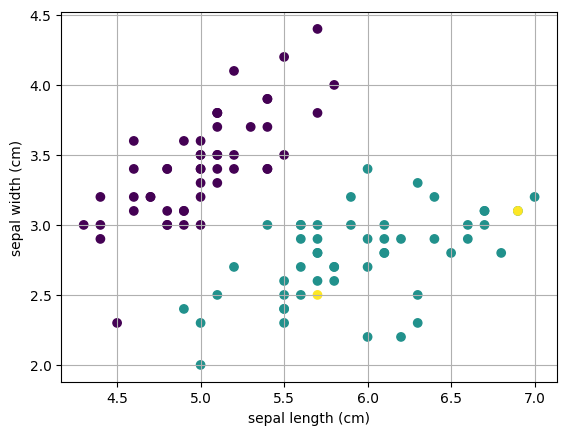

In [57]:
plt.scatter(x_data[feature_names[0]], x_data[feature_names[1]], c=targets, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid()
plt.show()

In [58]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [59]:
x_data = torch.tensor(x_data.values)
decision, y_pred = ocsvm.fit(x_data)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])

In [60]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [61]:
classifier.fit()

(array([ 7.90257485e-02,  7.91871146e-02,  5.03847036e-02,  3.77488078e-02,
         5.87349718e-02,  4.78088676e-02,  2.31948279e-02,  7.74882164e-02,
         3.51555224e-03,  7.91904399e-02,  7.72563332e-02,  5.32473373e-02,
         6.71204311e-02, -1.45784549e-02,  3.56141197e-02, -4.48457226e-02,
         4.78088676e-02,  7.90257485e-02,  6.95035105e-02,  4.26384691e-02,
         1.07074889e-01,  5.65781008e-02,  3.98837913e-03,  9.34550827e-02,
         5.32473373e-02,  8.97021447e-02,  7.74882164e-02,  8.73718926e-02,
         9.55057915e-02,  5.03847036e-02,  6.68616948e-02,  1.07074889e-01,
         0.00000000e+00, -4.20538737e-03,  7.91904399e-02,  8.79962574e-02,
         1.02675054e-01,  4.71899155e-02,  4.34640195e-03,  8.72928340e-02,
         6.90954882e-02, -2.77428875e-02, -8.78294085e-08,  6.90954882e-02,
         4.26384691e-02,  6.71204311e-02,  4.26384691e-02,  3.49098231e-02,
         7.19776462e-02,  8.38151030e-02, -1.88139380e-02,  7.52124748e-02,
        -5.9

In [62]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])

In [63]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 91, 'percentage': 89.2156862745098}, -1: {'count': 10, 'percentage': 9.803921568627452}}


In [64]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[13, 15, 33, 41, 42, 50, 52, 60, 68, 101]

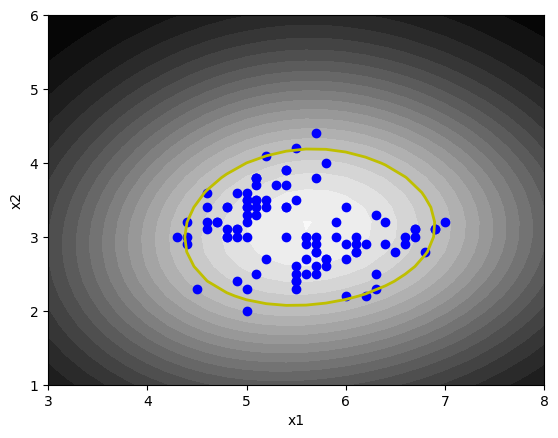

In [65]:
classifier.plot(3, 8, 1, 6)

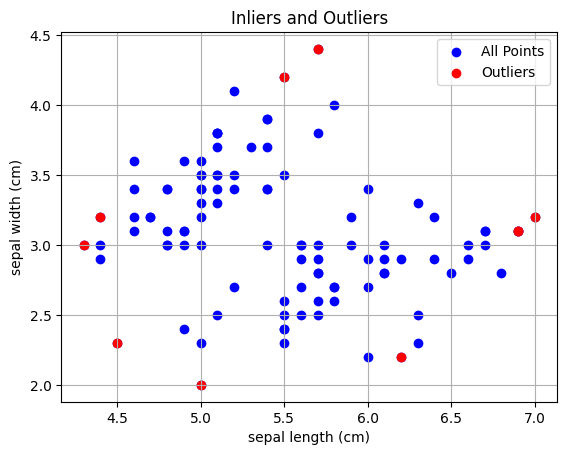

In [66]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [67]:
outlier_features = x_data[indices]
outlier_features

tensor([[4.3000, 3.0000],
        [5.7000, 4.4000],
        [5.5000, 4.2000],
        [4.5000, 2.3000],
        [4.4000, 3.2000],
        [7.0000, 3.2000],
        [6.9000, 3.1000],
        [5.0000, 2.0000],
        [6.2000, 2.2000],
        [6.9000, 3.1000]], dtype=torch.float64)

In [68]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [69]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 2318.15it/s]


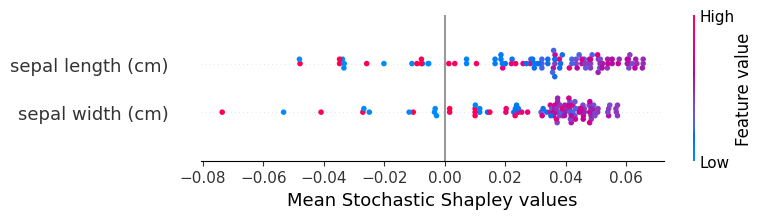

In [70]:
from src.utils.visualisation.deterministic_values import summary_plot,bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

As expected, sepal width has the highest shapley value.

Out of the 2 chosen points from the class 3, only 1 was found as an outlier (beacuse 2 features were omitted for simplicity)

Let us find the explanation for only point from class 3 found as an oulier

In [71]:
indices[9]

101

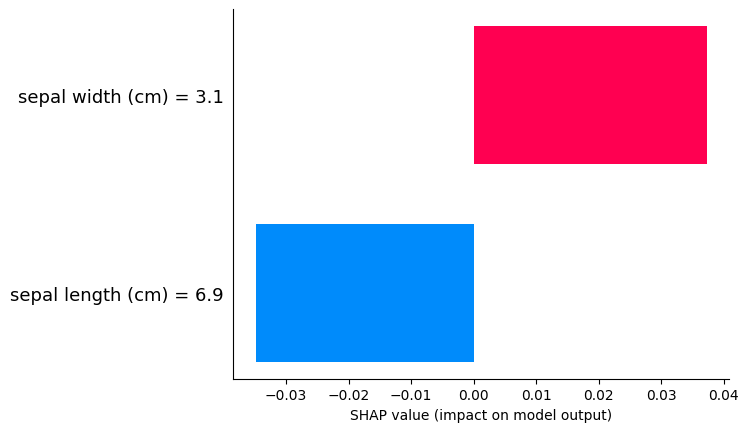

In [72]:
bar_plot(mean_stochastic_shapley_values.T[101], x_data[101], feature_names = feature_names)

Sepal width feature is causing it to be an outlier.

The other point from 3rd class is not detected as an outlier(maybe due to missing features)

## Experiment 1.5

Consider wine dataset with 5 features

In [73]:
wine = datasets.load_wine()

# Create a DataFrame with the feature names
df = pd.DataFrame(wine.data, columns=wine.feature_names)

feature_names = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity']
x_data = df[feature_names]
x_data

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity
0,14.23,1.71,2.80,3.06,5.64
1,13.20,1.78,2.65,2.76,4.38
2,13.16,2.36,2.80,3.24,5.68
3,14.37,1.95,3.85,3.49,7.80
4,13.24,2.59,2.80,2.69,4.32
...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70
174,13.40,3.91,1.80,0.75,7.30
175,13.27,4.28,1.59,0.69,10.20
176,13.17,2.59,1.65,0.68,9.30


In [74]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [75]:
x_data

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity
0,14.23,1.71,2.80,3.06,5.64
1,13.20,1.78,2.65,2.76,4.38
2,13.16,2.36,2.80,3.24,5.68
3,14.37,1.95,3.85,3.49,7.80
4,13.24,2.59,2.80,2.69,4.32
...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70
174,13.40,3.91,1.80,0.75,7.30
175,13.27,4.28,1.59,0.69,10.20
176,13.17,2.59,1.65,0.68,9.30


In [76]:
x_data = torch.tensor(X_scaled)

In [77]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [78]:
classifier.fit()

(array([ 1.29356905e-02,  3.73948823e-03,  8.94483145e-03,  6.95608439e-03,
         1.40277033e-02,  1.29630381e-02,  6.42438846e-03,  1.17521280e-02,
        -2.77555756e-17,  3.72502809e-03,  1.23990783e-02,  1.05235525e-02,
         2.75951441e-03, -6.13019023e-03,  4.65410662e-07, -2.20468004e-02,
         1.34618755e-02,  1.36054059e-02,  4.76152080e-03,  1.42039585e-02,
        -2.23379596e-07,  1.41881148e-02, -1.10218687e-07,  6.35460023e-03,
         7.01049628e-03,  1.42261016e-03,  1.14241088e-02,  1.13251378e-02,
         7.99659314e-03,  8.58693261e-03,  7.65902714e-03,  1.71542456e-03,
         7.98659249e-04,  5.62380026e-07,  6.53823694e-03,  5.71800393e-03,
        -2.29669478e-08,  1.03838244e-02,  9.10360370e-04,  1.04321375e-02,
         1.37162826e-02, -2.33195370e-02,  1.02161038e-03,  5.90365799e-03,
         9.48584690e-03,  6.94598539e-03,  1.30339561e-02,  7.57697519e-03,
         1.42980044e-02,  9.58484363e-03,  2.89663561e-07,  1.56811228e-02,
         1.4

In [79]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [80]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 140, 'percentage': 93.33333333333333}, -1: {'count': 10, 'percentage': 6.666666666666667}}


In [81]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[8, 13, 15, 20, 22, 36, 41, 60, 118, 131]

In [82]:
outlier_features = x_data[indices]
outlier_features

tensor([[-1.7489, -0.3622, -1.3402, -1.3154],
        [-1.8700, -0.1320, -1.5107, -1.4471],
        [-0.1737,  3.0908, -1.2834, -1.0522],
        [-0.5372,  0.7888, -1.1697, -1.3154],
        [-1.5065,  1.2492, -1.5676, -1.3154],
        [-0.4160,  1.0190, -1.3971, -1.3154],
        [-1.6277, -1.7434, -1.3971, -1.1838],
        [-1.0218, -2.4339, -0.1466, -0.2624],
        [ 2.2497, -1.0528,  1.7858,  1.4488],
        [ 2.4920,  1.7096,  1.5016,  1.0539]], dtype=torch.float64)

[-0.1737,  3.0908, -1.2834, -1.0522] is an outlier due to its 2nd feature(malic_acid)

In [83]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [84]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 15/15 [00:00<00:00, 19.54it/s]


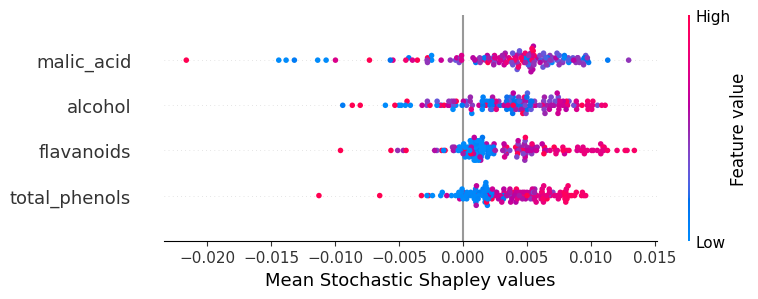

In [85]:
from src.utils.visualisation.deterministic_values import summary_plot,bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

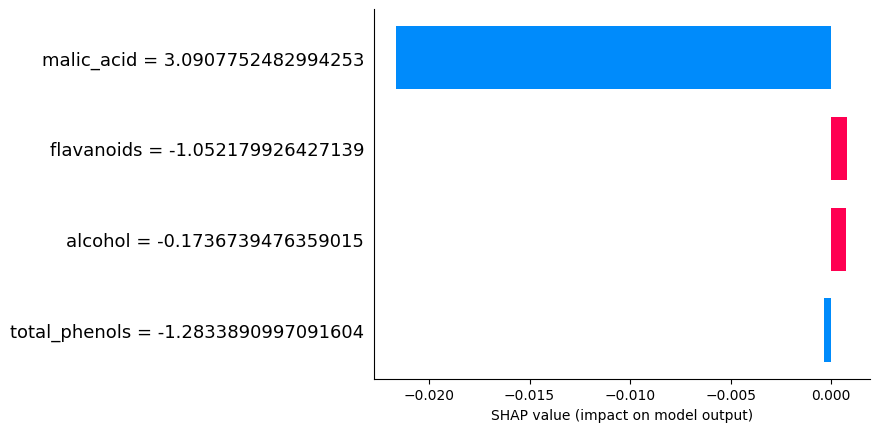

In [86]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

As expected malic_acid has the highest shapley value

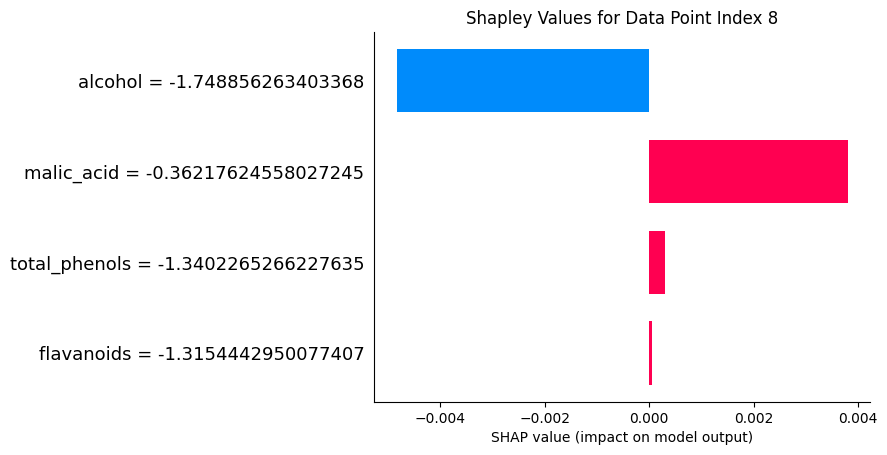

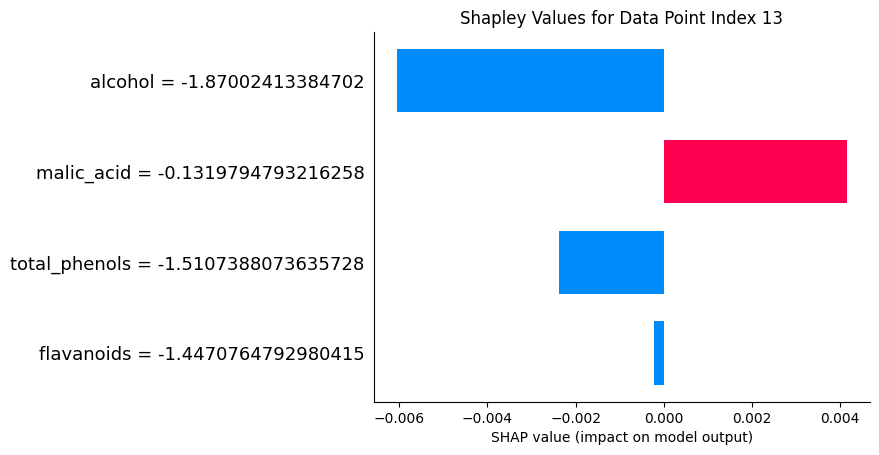

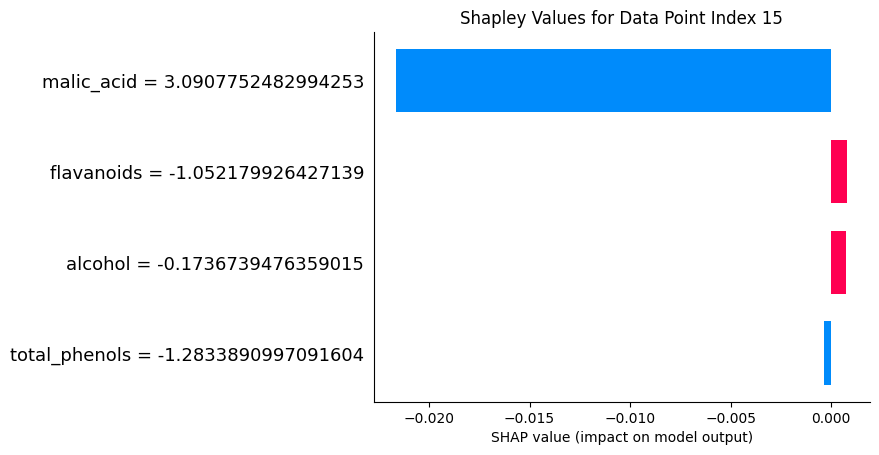

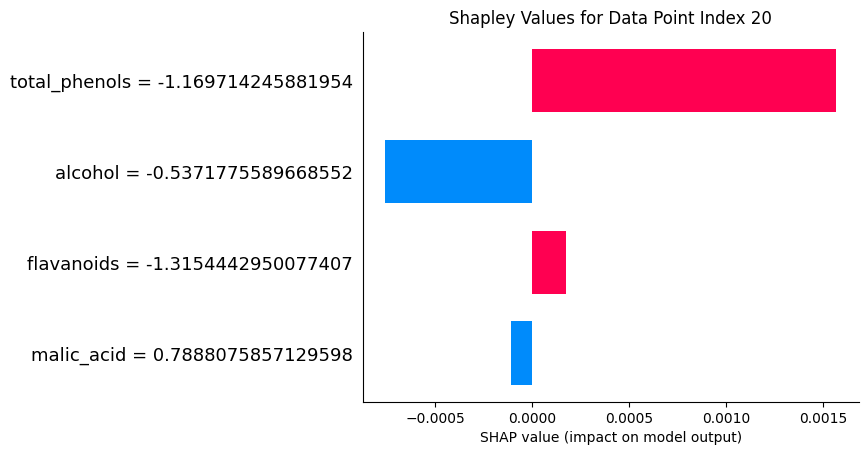

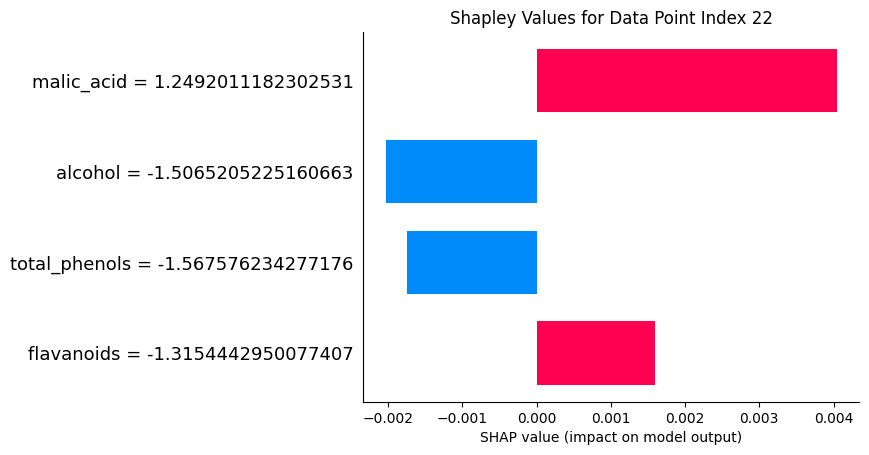

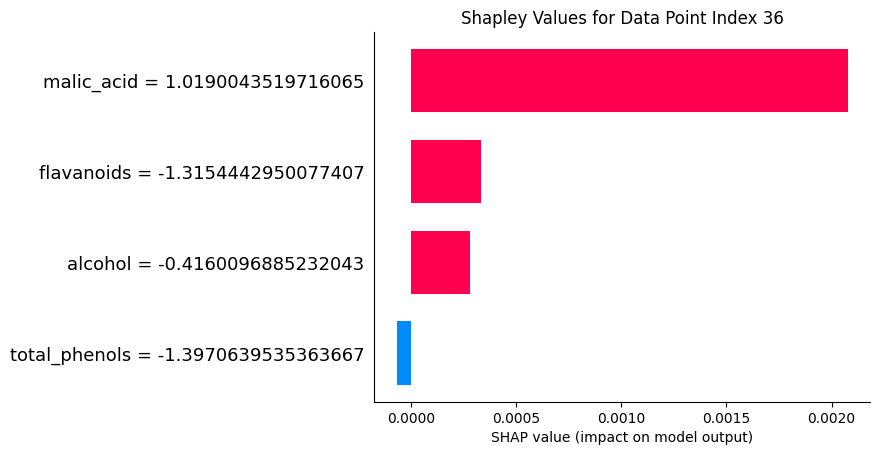

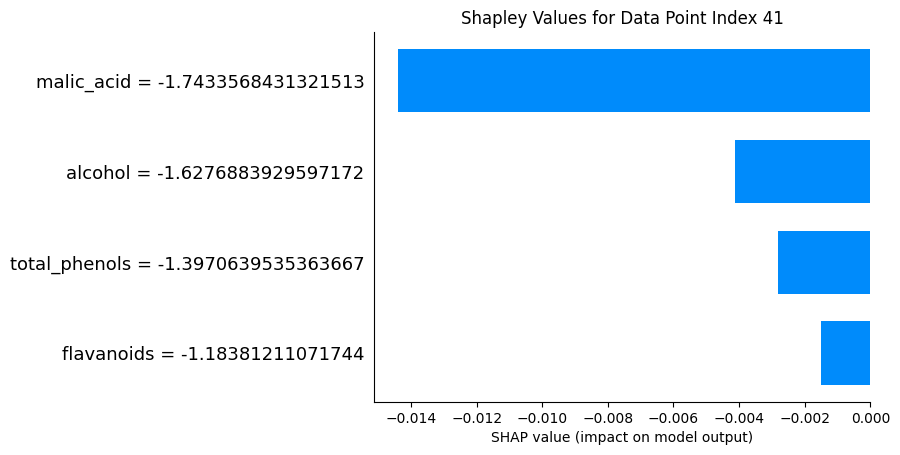

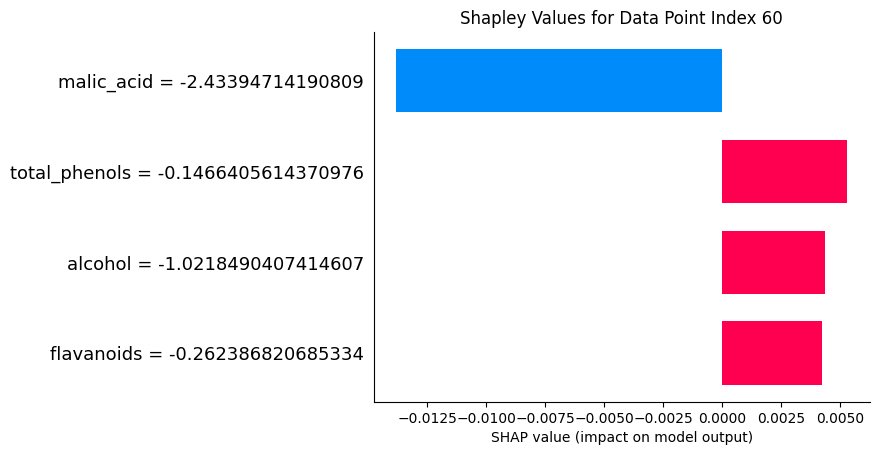

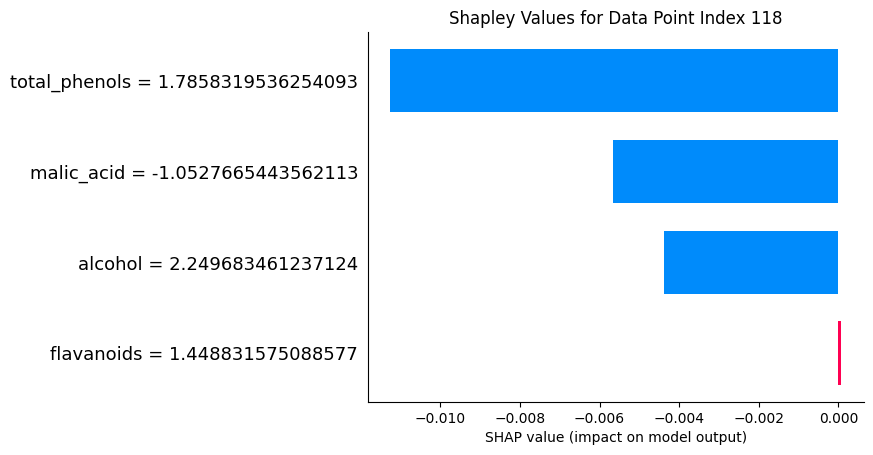

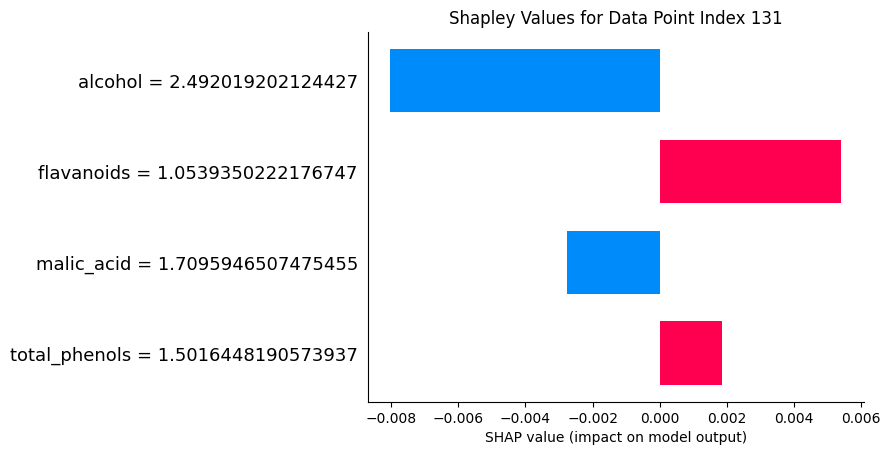

In [87]:
# Bar plot to dipict the contributiion of each feature to all the outliers
for i in indices:
    plt.figure()  
    bar_plot(mean_stochastic_shapley_values.T[i], x_data[i], feature_names=feature_names)
    plt.title(f'Shapley Values for Data Point Index {i}')
    plt.show() 